# 10 ОЦЕНКА ОШИБОК

В предыдущих разделах вы имели возможность познакомиться с некоторыми показателями, применяемыми для сравнения моделей или определения того, насколько хорошо модель выполняет возложенные на нее задачи. Здесь вы узнаете о лучших методиках оценки точности прогнозов, в первую очередь составляемых в ходе анализа временных рядов.

Те из вас, кто плохо знаком с прогнозированием временных рядов, должны понимать, что стандартная перекрестная проверка плохо подходит для оценки результатов прогнозирования, и обычно такую оценку проводить не рекомендуется
.
Здесь вы не сможете выбирать случайные наборы данных для обучения, проверки и тестирования, к тому же подбираемые без привязки ко времени. Но это не самая большая трудность. Приходится учитывать временную взаимосвязь между отдельными выборками даже несмотря на то, что они кажутся независимыми. Предположим, вам нужно классифицировать временные ряды, и вы располагаете большим количеством выборок временных рядов, каждая из которых представляет отдельную точку данных. Может показаться заманчивым выбирать временные ряды для обучения, проверки и тестирования случайным образом, но это большая ошибка. Недостаток такого подхода состоит в невозможности отражения в модели особенностей ее использования, а именно того, что она обучается на более ранних данных, а тестируется — на более поздних
.

Нельзя допустить, чтобы в модель поступала будущая информация, потому что в действительности такие ситуации попросту невозможны. Если это произойдет, то ошибка прогнозирования, которую вы получите для своей модели, будет заведомо ниже на этапе тестирования, чем в производственном процессе, поскольку тестирование будет заключаться в перекрестной проверке модели с учетом будущей информации (получите обратную связь с выбором модели
).
Рассмотрим конкретный сценарий, в котором наглядно показано, как такое может произойти. Представьте, что вы создаете программу мониторинга качества воздуха для крупных городов на Западном побережье США. Пусть в обучающий набор включены все данные за 2017 и 2018 годы для Сан-Франциско, Солт-Лейк-Сити, Денвера и Сан-Диего, а набор тестирования представлен одинаковым диапазоном данных для Лас-Вегаса, Лос-Анджелеса, Окленда и Феникс
а.

Вы обнаружите, что модель, применяемая для определения качества воздуха, особенно хороша в Лас-Вегасе и Лос-Анджелесе и лучше всего показывает себя в 2018 году. Замечатель
но!

Но как только вы попытаетесь воспроизвести процесс обучения модели на данных предыдущих десятилетий, сразу же обнаружите, что точность ее тестирования отличается от точности обучения/тестирования на других данных. Если вспомнить об аномальных лесных пожарах в Южной Калифорнии в 2018 году и заключить, что они были учтены в первоначальном тестировании/обучении, то становится понятно, что обучающий набор предоставляет своеобразное “окно в будущее”. Это важная причина, чтобы избегать стандартной перекрестной прове
рки.

Иногда проникновение информации из будущего не создает проблем при выборе модели. Например, если вы просто хотите понять динамику временного ряда, определяя, насколько хорошо его данные подлежат прогнозированию без акцентирования внимания на точности таких прогнозов, и проверяя возможное соответствие модели имеющимся данным, то в этом случае включение будущих данных будет не только допустимо, но полезно, хотя и может привести к переобучению, чего стоит опасаться. Можно смело утверждать, что, даже получив в свое распоряжение корректный набор тестирования, лишенный обратной утечки информации из будущего, не стоит забывать об опасностях перекрестной проверки при прогнозировании временных р
ядов.

Закончив с общими замечаниями, рассмотрим реальный механизм разделения данных модели на обучающие, проверочные наборы и наборы для тестирования. Затем изучим общие критерии определения хорошего прогноза и прогноза настолько хорошего, насколько это только возможно. Вы также узнаете об оценке неопределенности при использовании методов прогнозирования, которые в явном виде ее не учитывают или не выделяют ошибки в получаемых резуль
татах.
В заключение рассмотрим основные трудности, с которыми вы можете столкнуться при создании модели временного ряда или ее подготовке к запуску. Их понимание позволит избежать многих недоразумений!


### Проверка прогнозов: основные положения

Самое важное при составлении прогноза — убедиться, что он строится исключительно на основе заблаговременно и в полном объеме полученных данных. Следуя этому принципу, необходимо не только помнить о происходящих событиях, но и понимать, когда данные стали доступны для анализа (Между прочим, моделирование с данными или без данных, доступных в определенное время, которое выполняется для демонстрации важности своевременного получения информации, может стать побуждающим фактором для инженеров и исследователей к снабжению отдельных входных пакетов большим приоритетом, но только в случаях, если можно доказать их решающее влияние на точность модели и/или успех мероприятия в целом).<br>

Хотя это кажется достаточно простым утверждением, помните, что самая обычная предварительная обработка, такая как экспоненциальное сглаживание, может непреднамеренно привести к передаче информации с этапа обучения на этап тестирования. В этом можно легко удостовериться самостоятельно, подгоняя модель линейной регрессии сначала к авторегрессионному временному ряду, а затем — к экспоненциально сглаженному авторегрессионному временному ряду. Легко заметить, что чем сильнее сглаживаются временные ряды и чем больше период сглаживания, тем «точне» прогнозы. А все потому, что здесь прогнозированию отводится все меньше и меньше места, поскольку большая часть получаемых значений определяется по экспоненциальному среднему предыдущих значений. Это довольно опасный подход, и он настолько предательски обманчив, что до сих пор применяется в научных работах!<br>

Ввиду этих и других трудноразличимых опасностей просачивания будущей информации в прошлое или наоборот любая модель в обязательном порядке должна проходить тестирование на исторических данных, последовательно чередуемое с обучением, перекрестной проверкой и финальным тестированием.
При тестировании на исторических данных модель разрабатывается для одного набора или диапазона дат, а затем тщательно проверяется на доступных исторических данных, раскрывая весь потенциал возможных условий и параметров.<br>

Важно располагать весомыми причинами для тестирования на исторических данных конкретной модели, а количество рассматриваемых моделей должно быть как можно меньше. Как известно большинству специалистов по анализу данных, чем больше моделей подвергается тестированию, тем больше вероятность переоценки данных —*  подбора модели, в которой слишком большое внимание уделяется отдельным аспектам набора данных, вместо выделения обобщающих характеристик. К сожалению, для практикующих исследователей временных рядов, это путь шаткого компромисса, который часто приводит к непредвиденным результатам при запуске модели в производство.<br>

Но в каком виде реализуется тестирование на исторических данных? Попробуем создать структуру, подобную применяемой для перекрестной проверки, но учитывающую временную направленность данных. Общую парадигму, в которой последовательность “временной” обработки данных представляется в алфавитном порядке, можно проиллюстрировать следующим образом.   

Обучение на данных [А]       –       Тестирование на данных [В]

Обучение на данных [А В] 	–		Тестирование на данных [С]

Обучение на данных [А В С] 		–    Тестирование на данных [D]

Обучение на данных [А В С D] 	–	Тестирование на данных [Е]

Обучение на данных [А В С D Е] 	–	Тестирование на данных [F]


Такая структура тестирования проиллюстрирована на рис. 10.1.


![img1](https://drive.google.com/uc?id=1jw_bhLnpTLTQvN7RnIDmOiXsKmIAxbU6)
<br>Рисунок 10.1

### Особенности тестирования на исторических данных

Обязательно учитывайте динамику обучаемой модели при разработке структуры модели тестирования на исторических данных, особенно при обучении на данных за определенный временной диапазон.
В традиционных статистических моделях, таких как ARIMA, при выборе параметров модели все точки данных учитываются одинаково, поэтому чем большее данных, тем менее точной становится модель, параметры которой изменяются во времени. Это также справедливо для моделей машинного обучения, в которых все данные обучения учитываются в равной степени (Обратите внимание, что вы можете написать собственную функцию взвешивания потерь, приписывая более свежим данным более крупные веса, но для этого вам понадобятся навыки программирования выше среднего и знания методов численной оптимизации.)
.
С другой стороны, пакетные стохастические методы могут работают к весами и оценками, которые изменяются во времени. Таким образом, модели нейронных сетей, обученные с использованием типичных методов стохастического градиентного спуска, будут в некоторой степени учитывать временную природу данных, если обрабатывать их в хронологическом порядке. Последние поправки для весов градиента отражают последние данные. В большинстве случаев модели нейронных сетей для временных рядов обучаются на данных в хронологической последовательности, поскольку это чаще приводит к лучшим результатам, чем в моделях, которые обучены на данных, извлеченных в случайном порядк
е.
Избегайте пропусков в данных. Одна из важных особенностей временных рядов состоит в том, что точки данных автокоррелируют между собой. Следовательно, нельзя случайным образом выбирать точки во временном ряду для проверки или тестирования, потому что это приведет к нарушению автокорреляционных зависимостей в данных. В результате модель не сможет правильно распознать авторегрессионный компонент в данных, что совершенно неприемле
мо.
Модели пространства состояний также предоставляют возможности для адаптации с течением времени, заключающиеся в сокращении периода обучения, поскольку широкое окно не будет препятствовать росту апостериорной оценки с течением времени.


### Временные снимки модели

Поскольку модели тестируются после обучения проходом по временным точкам по предыдущим данным, вам понадобится простой способ сохранения состояния модели, снабженного временной отметкой, чтобы понимать, с какого наиболее раннего момента времени можно начинать ее использовать. Тем самым вы предотвратите непреднамеренное тестирование модели на данных обучения. Это также позволит протестировать несколько разных моделей для отличных временных периодов времени на одних и тех же данных. Кроме того, так можно выяснить, влияет ли на точность модели временной период данных тестирования, выбранных для ее обучения. В конечном итоге все это поможет определиться с частотой повторного обучения моделей временных рядов в выходном коде.


### Достаточно хороший прогноз

То, когда прогноз можно считать достаточно хорошим, зависит от многих факторов: от общих целей, минимального уровня точности, с которым вы согласны мириться, а также от ограничений и характера рабочих данных. Если данные характеризуются высоким соотношением “шум/сигнал”, то не стоит ожидать от модели больших свершений.

Помните, что модели временного ряда не идеальны. Но вы должны сделать все возможное, чтобы заставить их быть такими же или даже более точными, чем методы вычисления систем дифференциальных уравнений, описывающих климатические изменения, советы хорошо информированного биржевого трейдера или сведения из учебника по медицине, в котором описываются принципы классификации ЭЭГ-кривых. Оценивая модель, учитывайте известные экспертные оценки прогнозирования в выбранной предметной области, поскольку они определяют верхний предел точности во многих задачах прогнозирования.

Но бывает и так, что вам хорошо известно о несовершенстве построенной модели, и потому вы хотите добиться от нее большего. Для дальнейшего ее улучшения рассмотрите следующие возможности.

*Постройте график результатов работы модели для набора тестовых данных*

Распределение, создаваемое моделью, должно соответствовать распределению прогнозируемых значений в отсутствие изменения режима или основной тенденции.
Например, если попытаться предсказать цены акций и знать, что они растут и падают примерно с одинаковой частотой, то модель можно считать неправильной, когда она предсказывает одно только повышение цены. Конечно, иногда по вполне очевидным причинам распределения значений неизвестны, но в остальных случаях можно и нужно применять статистические сведения для сравнения выходных данных модели с фактически наблюдаемыми значениями.

*Составьте график временной зависимости остатков модели*

Если остатки не однородны по времени, то модель считается недостаточно обученной. Временное поведение остатков может указать на дополнительные параметры, которые необходимо включить в модель для описания ее временного поведения.
Сравните модель с простой нулевой моделью, в которой учитывается течение времени
Простая нулевая модель состоит в том, что каждый прогноз для момента времени t должен совпадать со значением в момент времени t - 1. Если ваша модель не опережает по точности такую простую модель, то нет этому никакого оправдания. Если простая универсальная наивная модель может превзойти созданную вами модель, значит, с вашей моделью что-то не в порядке. Уточните функцию потерь или повторно проведите предварительную обработку данных, не изменяя сетку гиперпараметров. С другой стороны, плохой результат может быть следствием сильно зашумленных данных, что означает бесполезность предложенной модели для решения возложенных на нее задач (Простую нулевую модель удивительно сложно превзойти).
Изучите, как модель справляется с выбросами
Во многих предметных областях под выбросами понимается именно то, что они значат. Такие события не подлежат никакому предсказанию (В некоторых случаях бывает нечему учиться для принятия будущих решений), т.е. лучшее, что может предпринять модель, — просто проигнорировать выбросы, не принимая их в расчет. Если модель очень хорошо предсказывает выбросы, то это может быть признаком переобучения или неправильного подбора функции потерь. Все зависит от структуры модели и используемых вами функций потерь, но для большинства приложений понадобится модель, прогнозы которой не столь большие, как выбросы в исходном наборе данных. Конечно, приведенные рекомендации не касаются случаев, когда стоимость предупреждения выбросов очень высока, а задача прогнозирования сводится к тому, чтобы, по возможности, предупреждать выбросы.
Исследуйте временную чувствительность
Должно ли качественно сходное поведение в связанных временных рядах приводить к связанным результатам модели? Используя познания в основной динамике системы, убедитесь, что это так и что модель распознает и обрабатывает аналогичные временные шаблоны одинаковым образом. Например, если один временной ряд демонстрирует тенденцию к повышению со смещением на 3 единицы в день, а в другом наблюдается тренд к повышению со смещением на 2,9 единицы в день, то вы, скорее всего, захотите удостовериться в том, что в конечном итоге прогнозы, полученные для таких рядов, были похожими.
Также нужно проверить правильность ранжирования прогнозов по сравнению с исходными данными (больший дрейф должен привести к большему значению прогноза). Если это не так, то модель требует переобучения.
Это далеко не полный список способов тестирования моделей временных рядов, но он послужит хорошей отправной точкой для приобретения опыта в данной предметной области.
Оценка неопределенности с помощью моделирования
Одно из преимуществ традиционного статистического подхода к анализу временных рядов состоит в том, что в нем оценка неопределенности рассчитывается согласно строгим аналитическим формулам. Однако даже в таких случаях — и, само собой, в случае нестатистических методов анализа — бывает полезно рассмотреть неопределенность, обусловленную моделью прогнозирования, с помощью вычислительных методов. Один из интуитивно понятных и доступных для расчетов способов сделать это — простое моделирование.
Предположим, мы провели анализ процесса AR(1), определенного в одной из предыдущих глав. Вспомним, что процесс AR(1) можно выразить следующим образом.

После подгонки модели нужно понять, насколько изменчивой может быть оценка коэффициента  . В подобных случаях, чтобы узнать это, процесс многократно моделируется по методу Монте-Карло. Такая задача легко выполняется с помощью инструментов языка R, учитывая все, что нам известно об AR-процессах из раздела 5.


#### **Оценка неопределенности с помощью моделирования**

Одно из преимуществ традиционного статистического подхода к анализу временных рядов состоит в том, что в нем оценка неопределенности рассчитывается согласно строгим аналитическим формулам. Однако даже в таких случаях — и, само собой, в случае нестатистических методов анализа — бывает полезно рассмотреть неопределенность, обусловленную моделью прогнозирования, с помощью вычис766.000000,402.000000,637.000000�. Один из интуитивно понятных и доступных для расчетов способов сделать это — простое моделирование.
После подгонки модели нужно понять, насколько изменчивой может быть оценка коэффициента  . В подобных случаях, чтобы узнать это, процесс многократно моделируется по методу Монте-Карло. Такая задача легко выполняется с помощью инструментов языка R, учитывая все, что нам известно об AR-процессах из раздела 5.


In [1]:
%%capture
!pip install rpy2

In [2]:
%load_ext rpy2.ipython

In [3]:
%%capture
%%R
require (forecast)

In [4]:
%%capture
%%R
require (png)

In [5]:
%%R
phi <- 0.7

In [6]:
%%R
N <- 1000

In [7]:
%%R
time_steps <- 24

In [8]:
%%R
sigma_error <- 1

In [9]:
%%R
sd_series <- sigma_error / (1 - phi)

In [10]:
%%R
starts <- rnorm(N, sd = sqrt (sd_series))

In [11]:
%%R
estimates <- numeric(N)

In [12]:
%%R
res <- numeric(time_steps)

In [14]:
%%R
for (i in 1:N) {
 errs <- rnorm(time_steps, sd = sigma_error)
 res[1] <- starts[i] + errs[1]

 for (t in 2:time_steps) {
  res[t] <- phi * res[t-1] + errs[t]
 }
 estimates[i] <- arima(res, order = c(1, 0, 0))$coef[1]
}

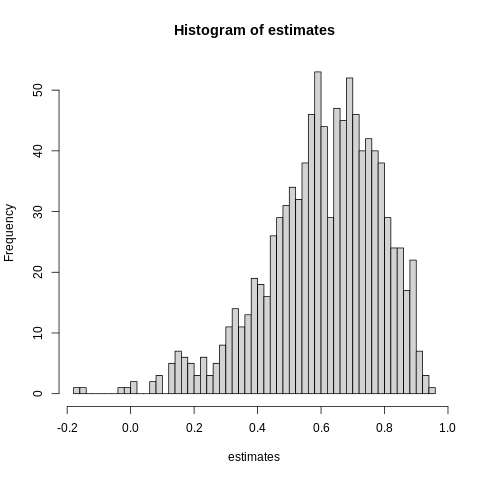

In [15]:
%%R
hist(estimates,
 breaks = 50)

В качестве результата выводится гистограмма оценки коэффициента fi

Кроме того, можно получить представление о диапазоне оценок и квантилей, воспользовавшись функцией summary (), примененной к оценкам.

In [16]:
%%R
summary (estimates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1772  0.5015  0.6233  0.6058  0.7382  0.9513 


Мы также можем обратиться к методам бутсрэпа, чтобы получить ответы на более сложные вопросы. Предположим, что нужно знать, какие вычислительные затраты связаны с упрощением модели относительно исходного варианта. Пусть изучаемый процесс представлен как AR(2), хотя исходно мы определили его как AR(1). Чтобы выяснить, как это сказывается на оценке модели, модифицируем предыдущий код R следующим образом.

Вам может показаться, что распределения не так уж и сильно различаются, и будете правы. Это подтверждается описательными статистиками (Будет ли плохое приближение проблемой, зависит от конкретных коэффициентов. В данном случае влияние неправильного выбора модели оказалось незначительным, но в других случаях оно может быть катастрофическим).

In [17]:
## Допустим, что истинный процесс - AR(2) ,

In [18]:
## но ввиду его высокой сложности переключаемся на arima. sim

In [19]:
%%R
phi_1 <- 0.7

In [20]:
%%R

phi_2 <- -0.2

In [21]:
%%R

estimates <- numeric(N)

In [22]:
%%R

for (i in 1:N) {
    res <- arima.sim(list (order = c(2,0,0),
    ar = c(phi_1, phi_2)),
    n = time_steps)
    estimates [i] <- arima(res, c(1, 0, 0))$coef[1]
}


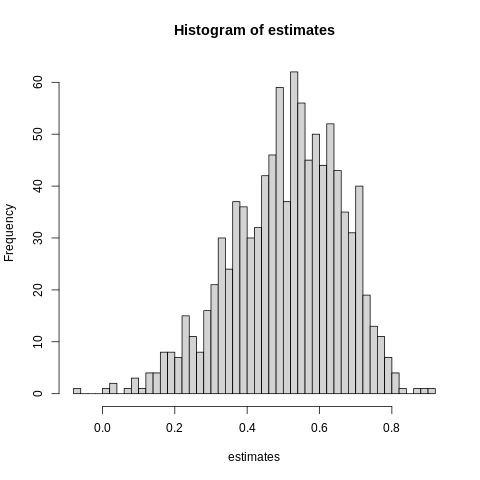

In [23]:
%%R

hist(estimates,
 breaks = 50)

Вам может показаться, что распределения не так уж и сильно различаются, и будете правы. Это подтверждается описательными статистиками (Будет ли плохое приближение проблемой, зависит от конкретных коэффициентов. В данном случае влияние неправильного выбора модели оказалось незначительным, но в других случаях оно может быть катастрофическим).

In [24]:
%%R

summary (estimates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.0730  0.4079  0.5262  0.5096  0.6232  0.9049 


Легко видеть, что диапазон оценок шире для правильно определенной модели, а оценка для члена первого порядка несколько хуже, чем для правильно заданной модели, но отклонение не слишком велико.

### Прогнозирование на несколько шагов вперед
В большинстве предыдущих глав мы занимались прогнозированием всего на шаг вперед, но при желании его можно выполнить вперед на несколько временных шагов. Необходимость в этом, наряду с другими причинами, возникает тогда, когда данные временных рядов имеют большее временное разрешение, чем значения временных рядов, для которых строится прогноз. Например, при изучении ежедневных цен на акции может возникнуть запрос на прогнозирование цен на акции на месяц вперед, чтобы разработать долгосрочную стратегию управления пенсионными вкладами. Или же, располагая ежеминутно собираемыми показаниями электрической активности мозга, может понадобиться предсказать инсульт по крайней мере за пять минут до его возникновения, чтобы дать пользователям/пациентам возможность провести упредительную терапию. В каждом из случаев найдутся причины для построения многошаговых прогнозов.
Прогнозирование до края горизонта
Это прогнозирование выполняется так же просто, как установка целевого значения у для отражения горизонта прогнозирования. Например, если данные состоят из поминутных индикаторов, а вам нужен прогноз на пять минут вперед, ограничьте входные данные модели моментом времени t и обучите ее для подписи, сгенерированной для данных до момента времени t + 5. Тогда вы сможете выполнить прогнозирование по этим данным с помощью методов простой линейной регрессии или машинного обучения, или даже нейронной сети глубокого обучения. Выглядит это следующим образом: модель(Х) = Y,
где Y можно выбирать на любом временном горизонте. Таким образом, каждая из следующих моделей будет корректной в зависимости от горизонта прогнозирования (вперед на 10 или 3 шага, как показано ниже):
• модель1(Хt) приближает Yt+10;
• модель2(Хt) приближает Yt+3.
### Рекурсивное прогнозирование к отдаленным временным горизонтам
Используя рекурсивный подход к подгонке различных горизонтов, вы будете строить одну модель, но готовиться к тому, чтобы направить результаты обратно на ее вход для прогнозирования более отдаленных горизонтов. Эта идея должна казаться вам знакомой, потому что ранее мы продемонстрировали, как с ее помощью реализуются стратегии многоэтапного подхода к прогнозированию по методу ARIMA. Предположим, что модель для прогнозирования на шаг вперед уже разработана в результате обучения по принципу модель(Хt) = Yt+1. Чтобы
подойти к горизонту на три шага вперед нужно сделать следующее:
• модель(Хt) —> оценка Yt+1;
• модель(Хt с оценкой Yt+1) —> оценка Yt+2;
• модель(Хt с оценкой Yt+1 и оценкой Yt+2) —> оценка Yt+3.
Ожидаемая ошибка оценки Yt+3 обязательно будет больше, чем оценка Yt+1. Насколько больше? Сложно сказать. Разобраться в этом помогло бы моделирование, как было показано ранее в этом разделе.
Многозадачное обучение для временных рядов
Многозадачное обучение — это общая концепция глубокого обучения, которая может применяться с особым значением для анализа временных рядов. В более общем смысле многозадачное обучение описывает идею о том, что модель может быть построена для одновременного достижения нескольких целей или для обучения обобщению при попытке одновременно предсказать несколько разных, но связанных вещей. Некоторые считают его средством регуляризации, поощряющим обобщение модели за счет обучения связанным задачам.
В контексте временных рядов многозадачное обучение можно применять, устанавливая цели для разных временных горизонтов в контексте прогнозирования.
В этом случае обучение модели будет выглядеть так:
•	модель(Хt) = (Yt+1, Yt+10, Yt+100)
•	модель(Хt) = (Yt+1, Yt+2, Yt+3)
При таком обучении целесообразно подумать об использовании функции потерь: нужно ли одинаково взвешивать все прогнозы или же отдавать предпочтение одним горизонтам прогноза по сравнению с другими?
Попытавшись построить очень дальний прогноз, для обучения своей модели можно использовать многозадачные, включая краткосрочные, горизонты, которые указывали бы характерные особенности, полезные для более отдаленного горизонта, но трудно распознаваемые непосредственно в нем из-за низкого уровня отношения “сигнал/шум” в данных. Еще один сценарий многозадачного моделирования заключается в работе с несколькими временными окнами в будущем — все в одном и том же сезоне, — но, возможно, в разные моменты времени (например, в течение нескольких лет весной или в течение нескольких недель по понедельникам). Это только один из многих способов одновременного учета сезонности и тренда.
### Особенности тестирования моделей
Перечислим наиболее серьезные трудности, с которыми приходится сталкиваться при оценке правильности тестирования модели в соответствии с выдвигаемыми производственными запросами.
### Упреждение
Вы могли заметить, что в этой книге большое внимание уделяется упреждению  его трудно избежать, и оно может вызвать катастрофические последствия при использовании модели в производственных целях. Постарайтесь предотвратить выпуск моделей, которые по той или иной причине не прошли производственную проверку. Это явный признак того, что из системы не было исключено упреждение. Не допускайте этого никогда!
### Структурные изменения
Выявление структурных изменений отчасти зависит от суждения, отчасти  от предметной области, а отчасти — от качества данных. Динамика данных временного ряда может со временем измениться настолько, что модель, которая подходит для описания одной части временного ряда, может не подходить для другой его части. Это одна из причин важности проведения разведочного анализа  убедиться, что одна и та же модель не обучается в рамках структурных изменений, что в заданных условиях не является ни оправданным, ни разумным.
